In [1]:
#Red Neuronal Convolucional Basica

import tensorflow as tf
import tensorflow_datasets as tfds



2024-01-25 11:45:05.102623: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-25 11:45:05.193988: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-25 11:45:05.194046: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-25 11:45:05.196140: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-25 11:45:05.210226: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-25 11:45:05.212172: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#Descargar set de ropa MNIST
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

2024-01-25 11:45:41.619285: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  75%|███████▌  | 3/4 [00:06<00:02,  2.09s/ url]

Dl Completed...: 100%|██████████| 4/4 [00:28<00:00,  8.59s/ url]

Dl Completed...: 100%|██████████| 4/4 [00:28<00:00,  7.24s/ url]


Dataset fashion_mnist downloaded and prepared to /home/albertocastrovill/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
datos_entrenamiento , datos_pruebas = datos["train"], datos["test"]

In [6]:
nombres_clases = metadatos.features["label"].names

In [7]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
#Normalizar

def normalizar(imagenes, etiquetas):
  imagenes= tf.cast(imagenes, tf.float32)
  imagenes/= 255
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

2024-01-25 11:46:56.406431: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


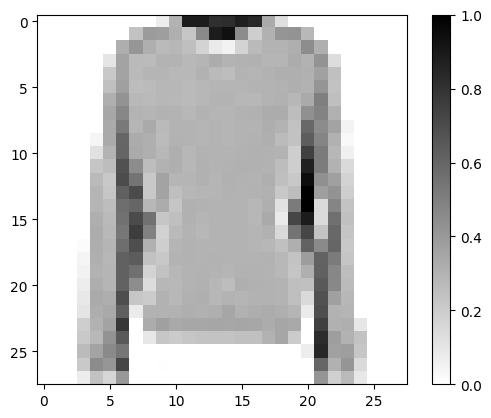

In [9]:
#Mostrar imagenes

for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) #Redimensionar datos

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

2024-01-25 11:46:59.740583: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


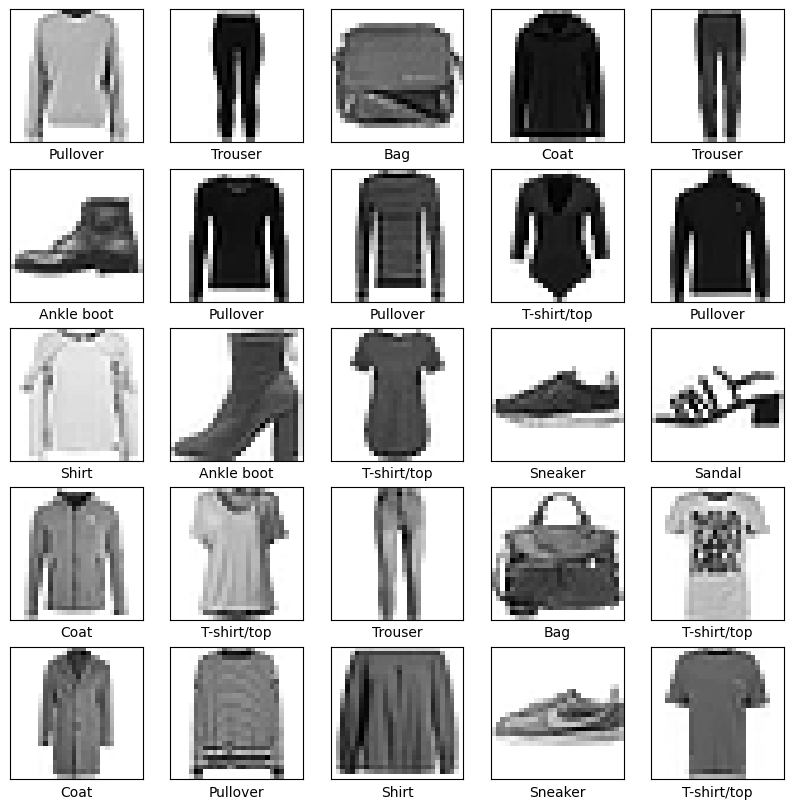

In [10]:
# VIsualizar mas elementos
plt.figure(figsize=(10,10))
for i, (imagen,etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])

plt.show()



In [11]:
# Creando la red neuronal

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
#Compilar el modelo

modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [13]:
num_entrenamiento = metadatos.splits["train"].num_examples
num_prueba = metadatos.splits["test"].num_examples

print(num_entrenamiento, num_prueba)

60000 10000


In [14]:
LOTE = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_entrenamiento).batch(LOTE)
datos_pruebas = datos_pruebas.batch(LOTE)

In [15]:
import math
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_entrenamiento/LOTE))

Epoch 1/5


1875/1875 [==============================] - 13s 3ms/step - loss: 0.5170 - accuracy: 0.8204
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3779 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3552 - accuracy: 0.8698
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3265 - accuracy: 0.8787
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3116 - accuracy: 0.8850


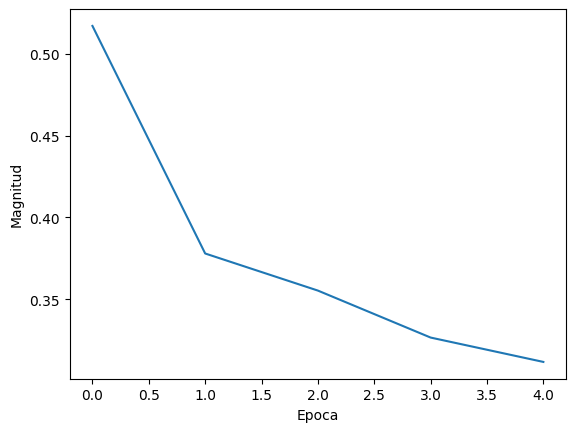

In [16]:
plt.xlabel("Epoca")
plt.ylabel("Magnitud")
plt.plot(historial.history["loss"])

1/1 [==============================] - 0s 138ms/step


2024-01-25 11:48:40.584935: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


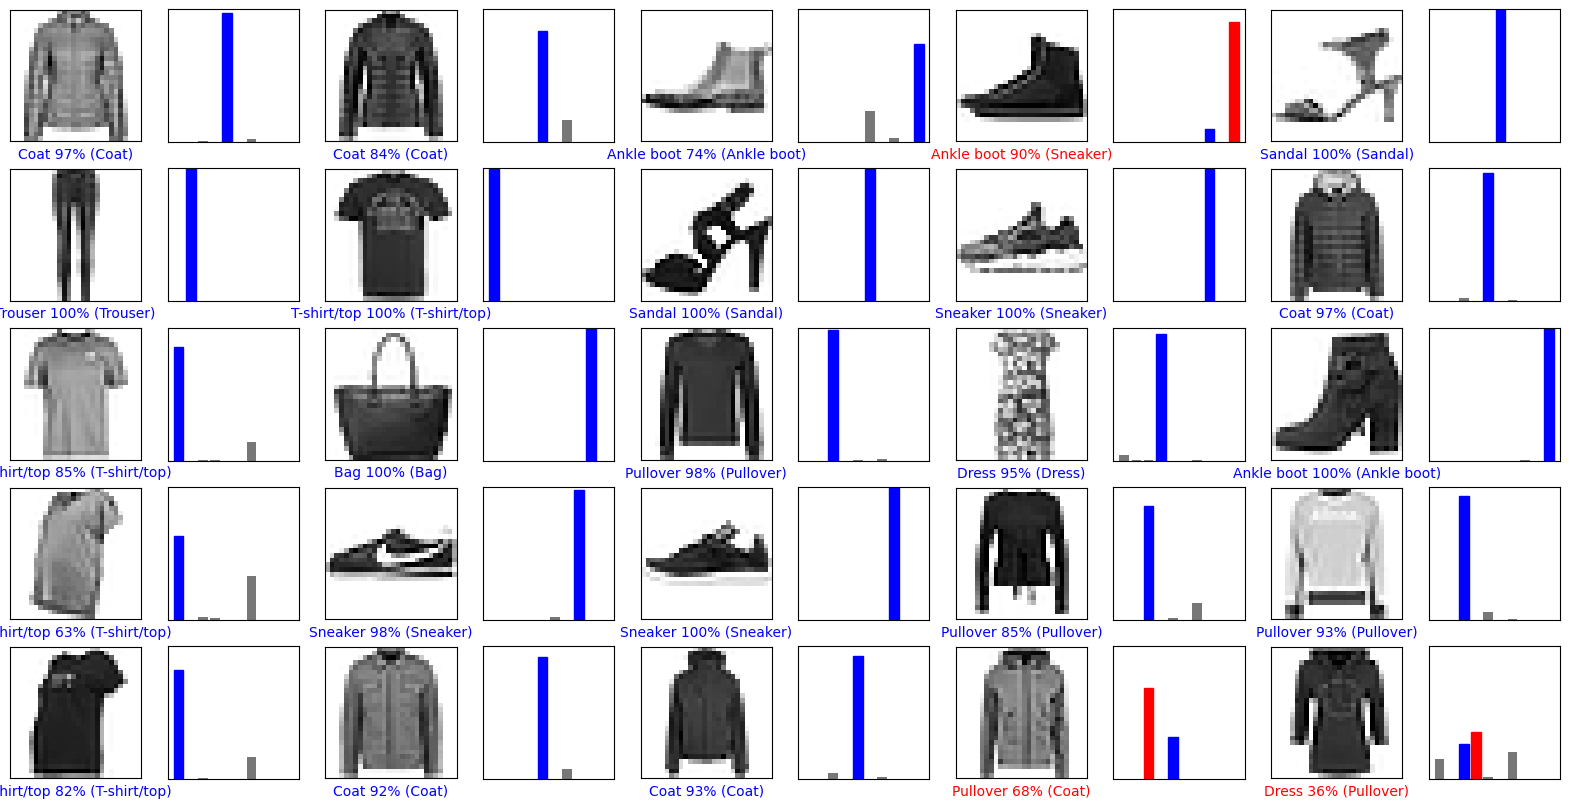

In [17]:
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)